In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Create classifiation dataset with 2 classes, 100000 samples, 20 features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=7, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

### Next, we will train 3 models as listed below:
1. Logistic Regression
2. Naive Bayes
3. Support Vector Classifier

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
svc = SVC(max_iter=10000,probability =True)

preds_logreg = lr.fit(X_train,y_train).predict_proba(X_test)[:,1]
preds_naive_bayes = nb.fit(X_train,y_train).predict_proba(X_test)[:,1]
preds_svc = svc.fit(X_train,y_train).predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### We will plot the probability distribution of test probabilities to see if there are any significant differences in trends.

Text(0.5, 1.0, 'Probability Density Plot for 3 Classifiers')

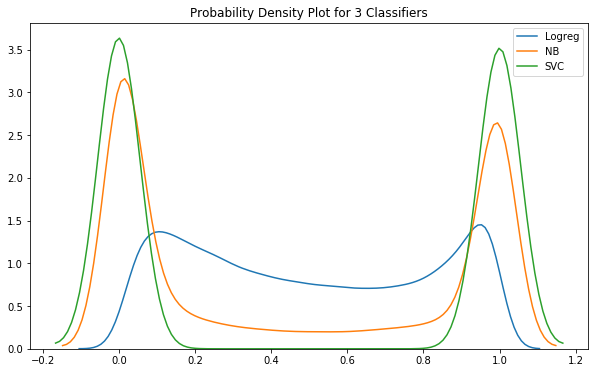

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.kdeplot(preds_logreg,label="Logreg")
sns.kdeplot(preds_naive_bayes,label="NB")
sns.kdeplot(preds_svc,label="SVC")
plt.title("Probability Density Plot for 3 Classifiers")

### We can already see some stark differences in the way the three models have computed output probabilities.
1. Logistic Regression has an even distribution and is generally not concentrated anywhere in particular. There is a slight accumulation of probabilities around 0 and 1, however, it isn’t very significant
2. Naive Bayes, has slightly higher concentration of probabilities around 0 and 1, but still has some values in the mid range
3. SVC, has almost all the values concentrated around 0 and 1, with negligible values in mid probability range

### Lets also look at the AUC-ROC plots for the classifiers, so we can better visualize the entire analysis.

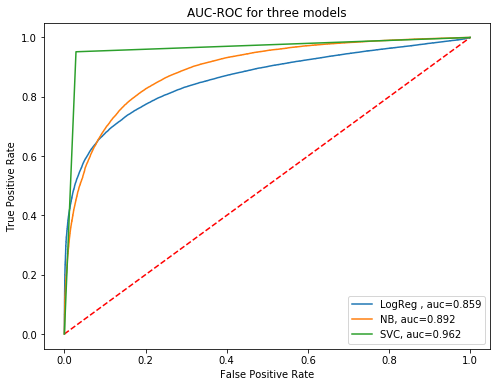

In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = preds_logreg
label = y_test
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="LogReg , auc="+str(round(auc,3)))

pred = preds_naive_bayes
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="NB, auc="+str(round(auc,3)))

pred = preds_svc
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="SVC, auc="+str(round(auc,3)))

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC for three models")
plt.legend(loc=0)
plt.show()

### So, SVC has the highest AUC of 0.962, followed by NB (0.892) and LogReg (0.859).
### So, can we conclude that SVC is the best model by only based on AUC score?
- Well, not really, we need to look at the how confident the model is based on predicted probability and actual values. This calibration analysis will allow us to deploy informed post-processing techniques to the probabilities so that the final output results in better score (AUC, logloss etc).

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Create classifiation dataset with 2 classes, 100000 samples, 20 features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=7, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

In [3]:
import numpy as np
def outputsort(y_test,pos_prob):
    sortedY=[]
    sortedYhat=[]
    sortpred_test = np.argsort(pos_prob)
    for i in sortpred_test:
        sortedY.append(y_test[i])
        sortedYhat.append(pos_prob[i])
    return sortedY,sortedYhat

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def calib_plot(y_test,y_prob,binsize):
    yact_avg=[]
    ypred_avg=[]
    for i in range(0,len(y_prob),binsize):
        yact=0
        ypred=0
        for j in range(i,(i+binsize)):
            yact+=y_test[j]
            ypred+=y_prob[j]
        yact_avg.append(yact/binsize)
        ypred_avg.append(ypred/binsize)
    plt.title('CALIBRATION PLOT')
    plt.plot([0,1],[0,1],label="Perfectly calibrated")
    plt.plot(ypred_avg,yact_avg,label="Classifier Used")
    plt.xlabel('AVERAGE OF Y^')
    plt.ylabel('AVERAGE OF Y')
    plt.legend()
    plt.show()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)==> uses decision_function


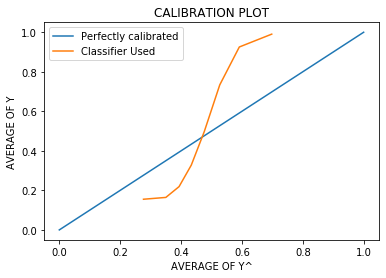

Brier Score: 0.18940925925466487
GaussianNB(priors=None, var_smoothing=1e-09)==> uses predict_proba


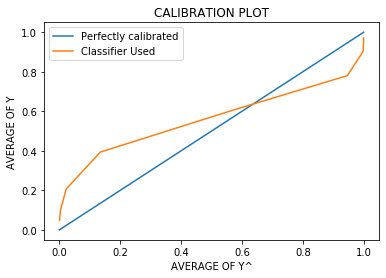

Brier Score: 0.15261899236262982
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=10000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)==> uses decision_function


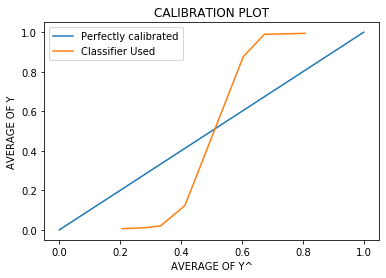

Brier Score: 0.10560688301577927


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')
lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
svc = SVC(max_iter=10000,probability =True)

clf_list=[lr,nb,svc]
for clf in clf_list:
    clf.fit(X_train,y_train)
    if hasattr(clf, "decision_function"):
        pos_prob = clf.decision_function(X_test)
        pos_prob =(pos_prob - pos_prob.min()) / (pos_prob.max() - pos_prob.min())
        print(str(clf)+"==> uses decision_function")
        
    else:  # use decision function
        pos_prob = clf.predict_proba(X_test)[:, 1]
        print(str(clf)+"==> uses predict_proba")
    sortedY,sortedYhat=outputsort(y_test,pos_prob)
    calib_plot(sortedY,sortedYhat,10000)
    clf_score = brier_score_loss(y_test, pos_prob, pos_label=y.max())
    print('Brier Score: '+str(clf_score))
    print('='*70)

# Platt Scaling

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='warn',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                                         warm_start=False),
                       cv=5, 

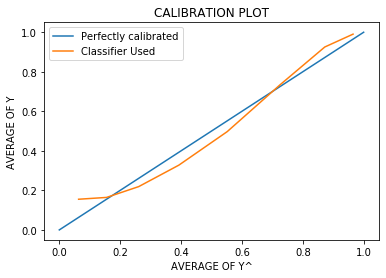

Brier Score: 0.14947585673344482
CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=5, method='sigmoid')


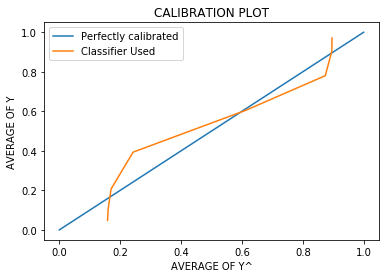

Brier Score: 0.13995855135154397
CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='rbf', max_iter=10000,
                                          probability=True, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=5, method='sigmoid')


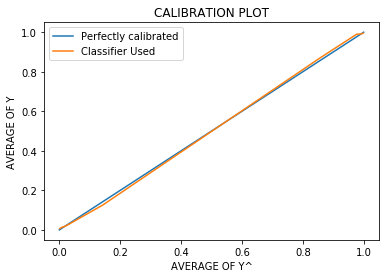

Brier Score: 0.03131100157594313


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
svc = SVC(max_iter=10000,probability =True)

clf_list=[lr,nb,svc]
for clfs in clf_list:
    clf = CalibratedClassifierCV(clfs,method='sigmoid',cv=5)
    clf.fit(X_train,y_train)
    pos_prob = clf.predict_proba(X_test)[:,1]
    sortedY,sortedYhat=outputsort(y_test,pos_prob)
    print(clf)
    calib_plot(sortedY,sortedYhat,10000)
    clf_score = brier_score_loss(y_test, pos_prob, pos_label=y.max())
    print('Brier Score: '+str(clf_score))
    print('='*70)

# Isotonic Regression

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='warn',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                                         warm_start=False),
                       cv=5, 

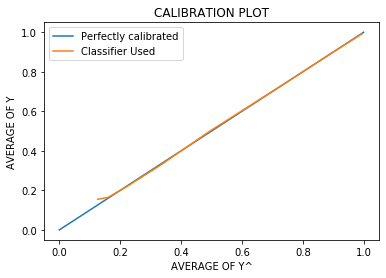

Brier Score: 0.14684781822649623
CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=5, method='isotonic')


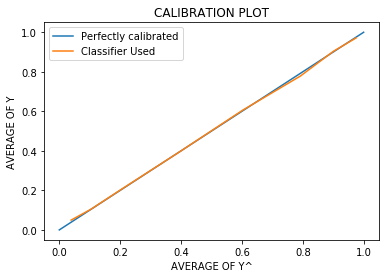

Brier Score: 0.13197404036231586
CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='rbf', max_iter=10000,
                                          probability=True, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=5, method='isotonic')


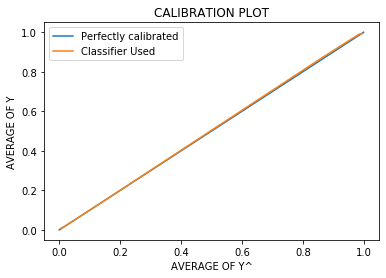

Brier Score: 0.031240691181459734


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
svc = SVC(max_iter=10000,probability =True)

clf_list=[lr,nb,svc]
for clfs in clf_list:
    clf = CalibratedClassifierCV(clfs,method='isotonic',cv=5)
    clf.fit(X_train,y_train)
    pos_prob = clf.predict_proba(X_test)[:,1]
    sortedY,sortedYhat=outputsort(y_test,pos_prob)
    print(clf)
    calib_plot(sortedY,sortedYhat,10000)
    clf_score = brier_score_loss(y_test, pos_prob, pos_label=y.max())
    print('Brier Score: '+str(clf_score))
    print('='*70)

## Pretty Table

In [10]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Calibration Technique", "Model", "Brier Score"]

x.add_row(["NA", "Logistic Regression", 0.189])
x.add_row(["NA", "Naive Bayes", 0.152])
x.add_row(["NA", "SVM", 0.105])

x.add_row(["Platt Scaling", "Logistic Regression", 0.149])
x.add_row(["Platt Scaling", "Naive Bayes", 0.139])
x.add_row(["Platt Scaling", "SVM", 0.031])

x.add_row(["Isotonic Regression", "Logistic Regression", 0.146])
x.add_row(["Isotonic Regression", "Naive Bayes", 0.131])
x.add_row(["Isotonic Regression", "SVM", 0.031])


print(x)

+-----------------------+---------------------+-------------+
| Calibration Technique |        Model        | Brier Score |
+-----------------------+---------------------+-------------+
|           NA          | Logistic Regression |    0.189    |
|           NA          |     Naive Bayes     |    0.152    |
|           NA          |         SVM         |    0.105    |
|     Platt Scaling     | Logistic Regression |    0.149    |
|     Platt Scaling     |     Naive Bayes     |    0.139    |
|     Platt Scaling     |         SVM         |    0.031    |
|  Isotonic Regression  | Logistic Regression |    0.146    |
|  Isotonic Regression  |     Naive Bayes     |    0.131    |
|  Isotonic Regression  |         SVM         |    0.031    |
+-----------------------+---------------------+-------------+
